### About Dataset
Brazilian E-Commerce Public Dataset by Olist
Welcome! This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

Context
This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. See more on our website: www.olist.com

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

Attention
1. An order might have multiple items.
2. Each item might be fulfilled by a distinct seller.
3. All text identifying stores and partners where replaced by the names of Game of Thrones great houses.

In [66]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import datetime

In [67]:
pd.set_option('display.max_columns', None)

Importing data
* Data order - Order details
* Data Customer - Customer details 
* Data payment - payment details

In [68]:
# import data orders
df1 = pd.read_csv('DataEcom/olist_orders_dataset.csv')
# import data customers
df2 = pd.read_csv('DataEcom/olist_customers_dataset.csv')
# import data payments
df3 = pd.read_csv('DataEcom/olist_order_payments_dataset.csv')

In [69]:
df1.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [70]:
df2.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


We can merge the Data set using a commend key 
* Here customer id

Cleaning the datasets

In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [72]:
df1.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

Here you can see that the columns 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'
* Are given as Dtype Object Converting them into Datatime DType

In [73]:
date = ['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date','order_delivered_customer_date', 'order_estimated_delivery_date']

In [74]:
for i in date:
    df1[i] = pd.to_datetime(df1[i])

In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [76]:
df1.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [77]:
df1_copy = df1.copy()
df1_copy.dropna(axis = 0, inplace=True)

In [78]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [79]:
df1.duplicated().sum()

0

In [80]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [81]:
df2.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [82]:
df2.duplicated().sum()

0

In [83]:
df_merged = df1_copy.merge(df2, on= 'customer_id', how='inner')

In [84]:
df_merged.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [85]:
df3.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


We can merge the 3rd dataset about the payment information with our merged dataset using order_id as the key

In [86]:
df3.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [87]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [89]:
df3.duplicated().sum()

0

In [97]:
df = df_merged.merge(df3, on='order_id', how='inner')

In [98]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,credit_card,3,179.12


#### We now have our main Data set

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100739 entries, 0 to 100738
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       100739 non-null  object        
 1   customer_id                    100739 non-null  object        
 2   order_status                   100739 non-null  object        
 3   order_purchase_timestamp       100739 non-null  datetime64[ns]
 4   order_approved_at              100739 non-null  datetime64[ns]
 5   order_delivered_carrier_date   100739 non-null  datetime64[ns]
 6   order_delivered_customer_date  100739 non-null  datetime64[ns]
 7   order_estimated_delivery_date  100739 non-null  datetime64[ns]
 8   customer_unique_id             100739 non-null  object        
 9   customer_zip_code_prefix       100739 non-null  int64         
 10  customer_city                  100739 non-null  object        
 11  

Removing irrelevant columns

In [100]:
df = df.drop(['order_status','order_purchase_timestamp',
'order_delivered_carrier_date','order_estimated_delivery_date'], axis = 1)

In [102]:
df.head()

,order_id,customer_id,order_approved_at,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26 03:24:27,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:55:23,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,credit_card,3,179.12


In [103]:
df.isna().sum()

order_id                         0
customer_id                      0
order_approved_at                0
order_delivered_customer_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
dtype: int64

In [104]:
df.corr()

,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value
customer_zip_code_prefix,1.000000,-0.027158,0.057161,0.058153
payment_sequential,-0.027158,1.000000,-0.088909,-0.071777
payment_installments,0.057161,-0.088909,1.000000,0.332009
payment_value,0.058153,-0.071777,0.332009,1.000000


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100739 entries, 0 to 100738
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       100739 non-null  object        
 1   customer_id                    100739 non-null  object        
 2   order_approved_at              100739 non-null  datetime64[ns]
 3   order_delivered_customer_date  100739 non-null  datetime64[ns]
 4   customer_unique_id             100739 non-null  object        
 5   customer_zip_code_prefix       100739 non-null  int64         
 6   customer_city                  100739 non-null  object        
 7   customer_state                 100739 non-null  object        
 8   payment_sequential             100739 non-null  int64         
 9   payment_type                   100739 non-null  object        
 10  payment_installments           100739 non-null  int64         
 11  

## Exploratory data analysis

* Rulling out the outliers if any

In [114]:
df[df['payment_value'] == 0]

,order_id,customer_id,order_approved_at,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
433,45ed6e85398a87c253db47c2d9f48216,8eab8f9b3c744b76b65f7a2c0c8f2d6c,2017-06-08 21:30:18,2017-06-22 17:44:53,e4000306cf2f63714e6bb70dd20a6592,74595,goiania,GO,3,voucher,1,0.0
32770,6ccb433e00daae1283ccc956189c82ae,843b211abe7b0264dd4a69eafc5bdf43,2017-10-27 00:46:58,2017-11-08 18:47:00,677ad9cdca6c47c733f0cc6e23d7bb4c,25625,petropolis,RJ,4,voucher,1,0.0
86858,b23878b3e8eb4d25a158f57d96331b18,648121b599d98c420ef93f6135f8c80c,2017-05-27 19:35:17,2017-06-07 08:53:10,9077449283dc1319d5e51fb3159b28e2,29230,anchieta,ES,4,voucher,1,0.0
98216,8bcbe01d44d147f901cd3192671144db,f2def7f64f36952f2f5a9791f0285f34,2018-01-24 23:37:20,2018-02-02 21:26:42,cc5aa1b8337e394da54980226bb0f6d4,21040,rio de janeiro,RJ,4,voucher,1,0.0


In [109]:
df['payment_value'].min()

0.0

In [108]:
df['payment_value'].max()

13664.08

We can see that the payment value for some items can be 0 (Due to use of vouchers as seen the the payment type)

<AxesSubplot:>

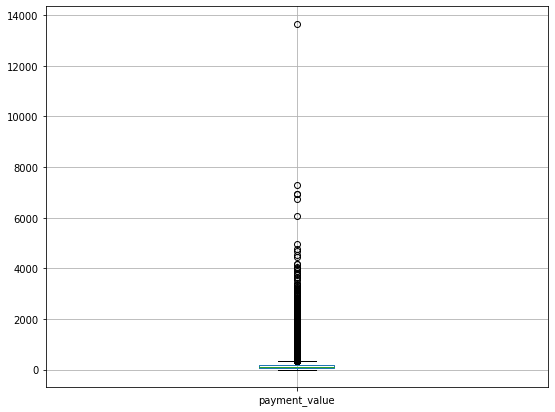

In [121]:
df.boxplot(column='payment_value', figsize=(9,7))

Doing Quantitative Analysis 

In [126]:
q1 = df['payment_value'].quantile(0.25)
q2 = df['payment_value'].quantile(0.75)
q1,q2


(56.78, 171.29)

In [128]:
IQR= q2-q1
boxplot_min = q1 - 1.5 * IQR
boxplot_max = q2 + 1.5 * IQR
print('\nIQR:',IQR)
print('\nMin:',boxplot_min)
print('\nMax:',boxplot_max)


IQR: 114.50999999999999

Min: -114.98499999999999

Max: 343.05499999999995


In [131]:
df_out = df[(df.payment_value<boxplot_min)| (df.payment_value>boxplot_max)]

In [132]:
df_out.head()

,order_id,customer_id,order_approved_at,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
18,403b97836b0c04a622354cf531062e5f,738b086814c6fcc74b8cc583f8516ee3,2018-01-02 19:09:04,2018-01-20 01:38:59,6e26bbeaa107ec34112c64e1ee31c0f5,21381,rio de janeiro,RJ,1,credit_card,10,1376.45
42,434d158e96bdd6972ad6e6d73ddcfd22,2a1dfb647f32f4390e7b857c67458536,2018-06-05 03:35:15,2018-06-18 21:32:52,5f7d7732b351ce851a158528581af05f,54330,jaboatao dos guararapes,PE,1,boleto,1,508.17
45,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,2017-11-25 00:21:09,2017-12-28 18:59:23,3e4fd73f1e86b135b9b121d6abbe9597,19400,presidente venceslau,SP,1,credit_card,10,356.12
56,641fb0752bf5b5940c376b3a8bb9dc52,f5afca14dfa9dc64251cf2b45c54c363,2017-12-15 00:14:55,2018-01-03 15:09:32,38cad70d154a4dcc42b598d5c01f7ef1,25211,duque de caxias,RJ,1,credit_card,10,386.33
67,688052146432ef8253587b930b01a06d,81e08b08e5ed4472008030d70327c71f,2018-04-24 18:25:22,2018-04-24 19:31:58,0e764fc1a13e47e900c3d59a989753e8,36045,juiz de fora,MG,1,credit_card,3,346.09


In [133]:
df_out.shape

(7695, 12)

* There are 7695 outlier values .. 
* For our analysis we will be removing them

In [136]:
df_clean =  ~((df[['payment_value']] < (q1 - 1.5 * IQR)) | (df[['payment_value']] > (q2 + 1.5 * IQR))).any(axis=1)
data = df[df_clean]
data

,order_id,customer_id,order_approved_at,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26 03:24:27,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:55:23,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,credit_card,3,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...
100733,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,2017-02-23 09:15:11,2017-03-06 11:08:08,831ce3f1bacbd424fc4e38fbd4d66d29,5127,sao paulo,SP,1,credit_card,3,155.99
100734,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,2017-03-17 15:08:01,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,1,credit_card,3,85.08
100735,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 13:10:37,2018-02-28 17:37:56,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1,credit_card,3,195.00
100736,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 15:04:16,2017-09-21 11:24:17,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1,credit_card,5,271.01


## ALL the outlier values are now removed from the dataset

In [139]:
data.shape

(93044, 12)

<AxesSubplot:xlabel='payment_value'>

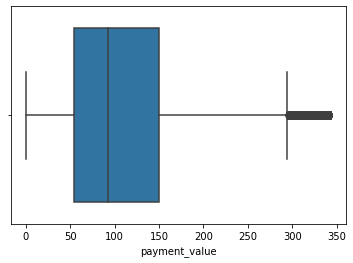

In [142]:
sns.boxplot(x=data['payment_value'])

#### Kurtosis for Bais check
* Kurtosis is the fourth central moment divided by the square of the variance. If Fisher’s definition is used, then 3.0 is subtracted from the result to give 0.0 for a normal distribution.
If bias is False then the kurtosis is calculated using k statistics to eliminate bias coming from biased moment estimators

#### Skewness for symetry check
* Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

In [146]:
data_desc = data.describe()
data_desc

,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value
count,93044.000000,93044.000000,93044.000000,93044.000000
mean,34749.077426,1.094891,2.628090,109.856154
std,29749.849625,0.678181,2.450228,72.456220
min,1003.000000,1.000000,0.000000,0.000000
25%,11060.000000,1.000000,1.000000,54.000000
50%,24220.000000,1.000000,1.000000,92.135000
75%,57682.500000,1.000000,3.000000,150.280000
max,99980.000000,26.000000,24.000000,342.940000


In [147]:
data_desc.loc['kurtosis'] = data[['payment_installments','payment_value']].kurt()
data_desc.loc['skewness'] = data[['payment_installments','payment_value']].skew()
data_desc

,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value
count,93044.000000,93044.000000,93044.000000,93044.000000
mean,34749.077426,1.094891,2.628090,109.856154
std,29749.849625,0.678181,2.450228,72.456220
min,1003.000000,1.000000,0.000000,0.000000
25%,11060.000000,1.000000,1.000000,54.000000
50%,24220.000000,1.000000,1.000000,92.135000
75%,57682.500000,1.000000,3.000000,150.280000
max,99980.000000,26.000000,24.000000,342.940000
kurtosis,NaN,NaN,3.082849,0.478710
skewness,NaN,NaN,1.794036,0.992607


Along with skewness, kurtosis is an important descriptive statistic of data distribution. However, the two concepts must not be confused with each other. Skewness essentially measures the symmetry of the distribution, while kurtosis determines the heaviness of the distribution tails.

In finance, kurtosis is used as a measure of financial risk. A large kurtosis is associated with a high risk for an investment because it indicates high probabilities of extremely large and extremely small returns. On the other hand, a small kurtosis signals a moderate level of risk because the probabilities of extreme returns are relatively low.

What is Excess Kurtosis?
Excess kurtosis is a metric that compares the kurtosis of a distribution against the kurtosis of a normal distribution. The kurtosis of a normal distribution equals 3. Therefore, the excess kurtosis is found using the formula below:

Excess Kurtosis = Kurtosis – 3

<AxesSubplot:>

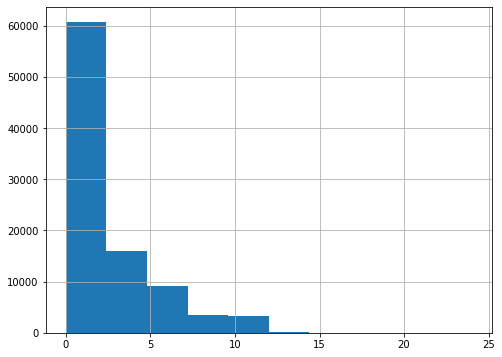

In [148]:
plt.figure(figsize=(8,6))
data['payment_installments'].hist(bins=10)

In [149]:
customers_state = data.groupby(['customer_state']).count()['customer_unique_id'].reset_index().sort_values(by='customer_unique_id',ascending=False)
customers_state.rename(columns = {'customer_unique_id':'total'}, inplace=True)
customers_state

,customer_state,total
25,SP,39682
18,RJ,11993
10,MG,10935
22,RS,5115
17,PR,4733
23,SC,3363
4,BA,3169
6,DF,1970
7,ES,1925
8,GO,1867


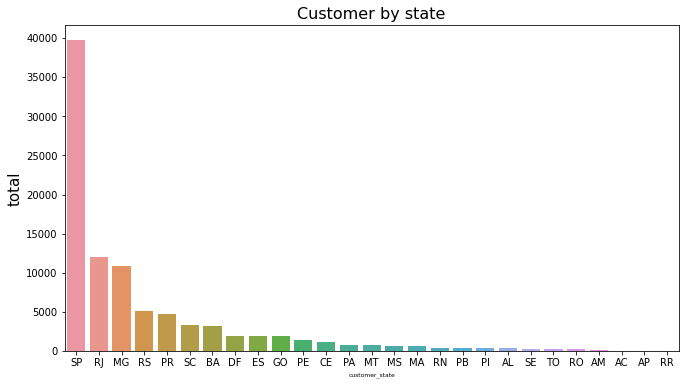

In [154]:
plt.figure(figsize=(11,6))
visual = sns.barplot(x='customer_state', y = 'total',data= customers_state, )
visual.set_xlabel('customer_state',fontsize = 6)
visual.set_ylabel('total', fontsize = 15)
plt.title('Customer by state',fontsize = 16)
plt.show()

In [157]:
mean_df = data[['customer_state','payment_value']].groupby(by=['customer_state'], dropna=False).mean().reset_index()

In [158]:
count_df = data[['customer_state','payment_value']].groupby(by=['customer_state'], dropna=False).count().reset_index()

In [159]:
result = pd.merge(mean_df, count_df, how="inner", on='customer_state',suffixes=('_avg', '_count'))

In [160]:
result.sort_values('payment_value_avg',ascending=False).reset_index(drop=True)

,customer_state,payment_value_avg,payment_value_count
0,AP,149.871667,60
1,AC,146.457879,66
2,RO,139.693674,215
3,PB,135.422340,453
4,MA,133.534477,641
5,RR,133.346364,33
6,AL,132.651353,340
7,PA,132.105690,840
8,PI,131.890897,435
9,RN,131.415551,454


<AxesSubplot:xlabel='customer_state', ylabel='payment_value_avg'>

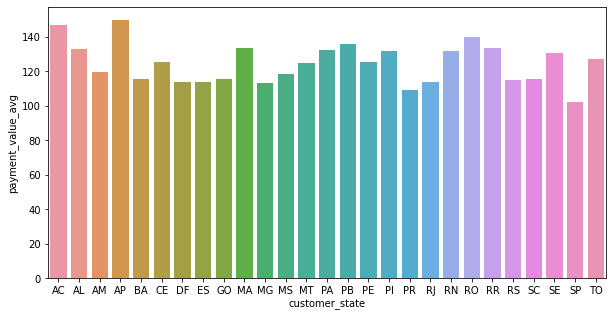

In [162]:
plt.figure(figsize=(10,5))
sns.barplot(x='customer_state', y = 'payment_value_avg',data= result)

<AxesSubplot:xlabel='customer_state', ylabel='payment_value_count'>

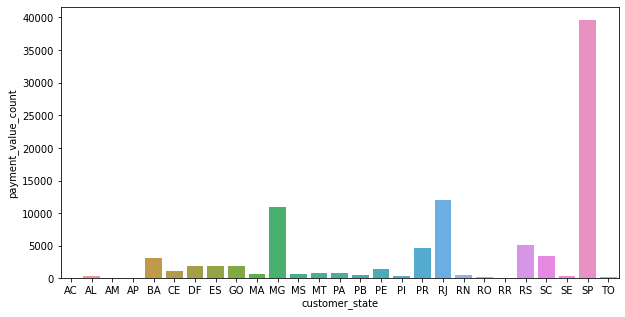

In [163]:
plt.figure(figsize=(10,5))
sns.barplot(x='customer_state', y = 'payment_value_count',data= result)

In [168]:
# the number of order per month
order_monthly = data[['order_approved_at']].groupby(data['order_approved_at'].dt.to_period('M')).agg({'order_approved_at':'count'})
#Change the column name to num_of_orders
order_monthly = order_monthly.rename(columns = {'order_approved_at': 'num_of_orders'})
#Changing order_approved_at to column, not an index
order_monthly = order_monthly.reset_index()

#adding column for month name and year 
order_monthly['month_year'] = order_monthly['order_approved_at'].dt.strftime('%b-%Y')
order_monthly

,order_approved_at,num_of_orders,month_year
0,2016-10,256,Oct-2016
1,2016-12,1,Dec-2016
2,2017-01,678,Jan-2017
3,2017-02,1600,Feb-2017
4,2017-03,2502,Mar-2017
5,2017-04,2211,Apr-2017
6,2017-05,3499,May-2017
7,2017-06,3093,Jun-2017
8,2017-07,3839,Jul-2017
9,2017-08,4102,Aug-2017


In [169]:
order_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   order_approved_at  22 non-null     period[M]
 1   num_of_orders      22 non-null     int64    
 2   month_year         22 non-null     object   
dtypes: int64(1), object(1), period[M](1)
memory usage: 656.0+ bytes


#### The dataset is rangind from year 2016 to 2018 
* Lets analysis the orders per month throught out the year

Text(0.5, 1.0, 'Number of Order per Month 2016-2018')

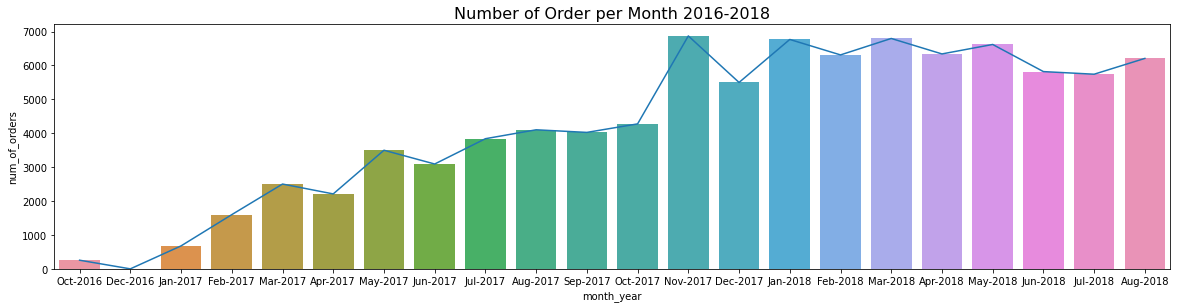

In [170]:
fig, ax = plt.subplots(figsize=(20, 4.5))
ax = sns.lineplot(x = 'month_year', y = 'num_of_orders', data = order_monthly)
ax = sns.barplot(data= order_monthly, x = 'month_year', y = 'num_of_orders')
ax.set_title('Number of Order per Month 2016-2018',fontsize = 16)

In [171]:
order_daily = data[['order_approved_at']].groupby(data['order_approved_at'].dt.dayofweek.sort_index()).count()
order_daily

,order_approved_at
order_approved_at,
0,12252
1,17977
2,14802
3,14471
4,13690
5,11367
6,8485


In [175]:
daily_index = order_daily.rename(columns = {'order_approved_at': 'num_of_orders'})
daily_trend = daily_index.reset_index()
daily_trend

,order_approved_at,num_of_orders
0,0,12252
1,1,17977
2,2,14802
3,3,14471
4,4,13690
5,5,11367
6,6,8485


In [176]:
dow = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
for i in range(7):
  daily_trend['order_approved_at'] = daily_trend['order_approved_at'].replace(i,dow[i])
daily_trend

,order_approved_at,num_of_orders
0,Monday,12252
1,Tuesday,17977
2,Wednesday,14802
3,Thursday,14471
4,Friday,13690
5,Saturday,11367
6,Sunday,8485


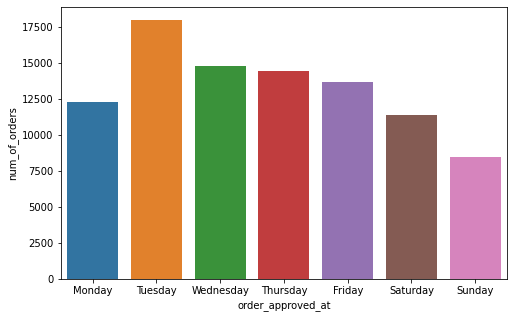

In [178]:
plt.figure(figsize=(8,5))
sns.barplot(data= daily_trend, x='order_approved_at', y = 'num_of_orders')
plt.show()

In [179]:
# percentage Order per Payment tyoe
payment_count_index = data[['payment_type']].groupby(data['payment_type']).count()
payment_count_index = payment_count_index.rename(columns = {'payment_type':'num_of_payment'})
payment_count = payment_count_index.reset_index()
payment_count

,payment_type,num_of_payment
0,boleto,17939
1,credit_card,68277
2,debit_card,1406
3,voucher,5422


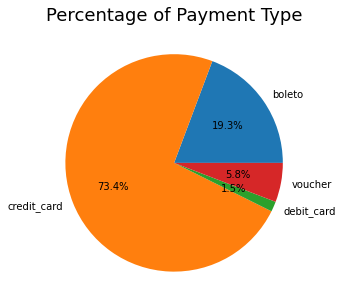

In [180]:
label = payment_count['payment_type']
plt.figure(figsize = (6,5))
plt.title('Percentage of Payment Type', fontsize = 18)
plt.pie(payment_count['num_of_payment'], labels = label,autopct = '%0.1f%%')
plt.show()

## Conclusion and insight

* There are 86100 of total customer with mean payment value in number 109.855 Brazilian Currency
* From 27 states mostly customers are living in SP
* The highest transaction happen in SP with the lower value, we can say it retail purchase
* Customer living in AP might buy expensive or product with the highest price, we can call it high class of customer or elite customer
* Mostly customer spent their time to buy a product on Tuesday
* Credit card is the best payment that customers choose around 73,4 % of total transaction